# NAME - DHANYA SRIVASTAVA
 # BATCH - DS2304

# Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database
The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


# Dataset Link-
• https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.cs

In [2]:
# IMPORTING LIBRARIES

import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [3]:
#IMPORTING DATA

df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [4]:
# CHECKING DATA SHAPE

df.shape

(907, 27)

In [5]:
#CHECKING VARIABLE NAME

df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
#checking datatype of all columns

df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
#Checking Empty spaces in Dataset

for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []

[0 rows x 27 columns]
Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []

[0 rows x 27 columns]
Empty DataFrame
Columns: [country, country_long, n

<AxesSubplot:>

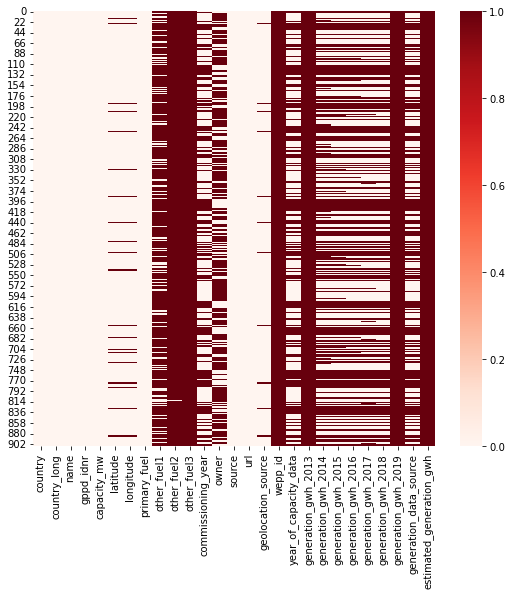

In [8]:
#Checking Null Values Using Heatmap

plt.figure(figsize=(9,8))
sns.heatmap(df.isnull(),cmap='Reds')

In [9]:
#checking null values

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [11]:
#  Checking  the Duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 

duplicate

Duplicate Rows :


Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []

[0 rows x 27 columns]

In [12]:
# drop variable 
df.drop('other_fuel2',axis=1,inplace=True)

In [13]:
df.drop('other_fuel3',axis=1,inplace=True)

In [14]:
# drop column
df.drop('wepp_id',axis=1,inplace=True)

In [15]:
#Empty column
df.drop('generation_gwh_2013',axis=1,inplace=True)

In [16]:
#Empty column
df.drop('generation_gwh_2019',axis=1,inplace=True)

In [17]:
#Empty column
df.drop('estimated_generation_gwh',axis=1,inplace=True)

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
sim_int=SimpleImputer(strategy='mean')
sim_object=SimpleImputer(strategy='most_frequent')

In [20]:
list_int=['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
list_object=['other_fuel1','owner','geolocation_source','generation_data_source']

In [21]:
for x in list_int:
    df[x]=sim_int.fit_transform(df[x].values.reshape(-1,1))

In [22]:
for x in list_object:
    df[x]=sim_object.fit_transform(df[x].values.reshape(-1,1))

In [23]:
#Checking null values
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [24]:
#counting uniques of all columns
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         74
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       372
generation_gwh_2015       397
generation_gwh_2016       404
generation_gwh_2017       409
generation_gwh_2018       411
generation_data_source      1
dtype: int64

In [25]:
#droping the column those which have only 1 unique

df.drop('country',axis=1,inplace=True)
df.drop('country_long',axis=1,inplace=True)
df.drop('year_of_capacity_data',axis=1,inplace=True)
df.drop('generation_data_source',axis=1,inplace=True)

In [26]:
df.nunique()

name                   907
gppd_idnr              907
capacity_mw            361
latitude               837
longitude              828
primary_fuel             8
other_fuel1              3
commissioning_year      74
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2014    372
generation_gwh_2015    397
generation_gwh_2016    404
generation_gwh_2017    409
generation_gwh_2018    411
dtype: int64

In [27]:
#Checking Unique

print(df['primary_fuel'].unique())

print(df['primary_fuel'].value_counts())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


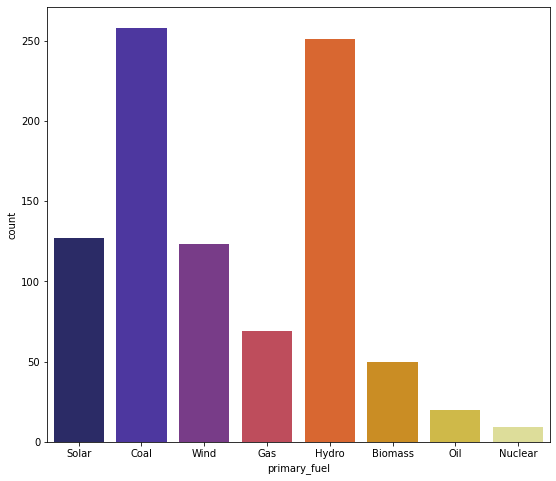

In [28]:
#countplot of primary_fuel

plt.figure(figsize=(9,8))
sns.countplot(df['primary_fuel'],palette='CMRmap');

In [29]:
#Checking Unique

print(df['other_fuel1'].unique())

print(df['other_fuel1'].value_counts())

['Oil' 'Cogeneration' 'Gas']
Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


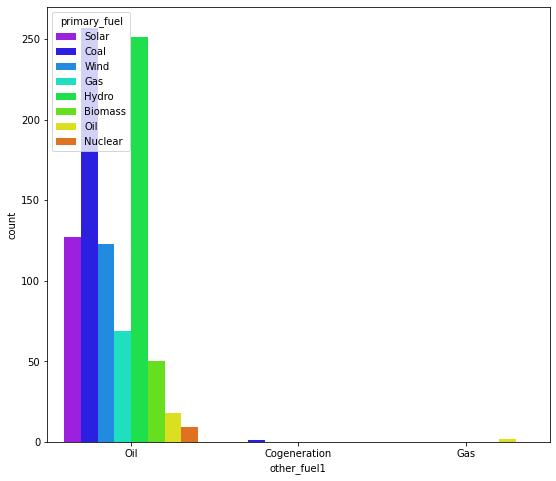

In [30]:
#Countplot of Primary_fuel

plt.figure(figsize=(9,8))
sns.countplot(df['other_fuel1'],palette='gist_rainbow_r',hue='primary_fuel',data=df);

In [31]:
#Checking Unique

print(df['geolocation_source'].unique())
print(df['geolocation_source'].value_counts())

['National Renewable Energy Laboratory' 'WRI' 'Industry About']
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


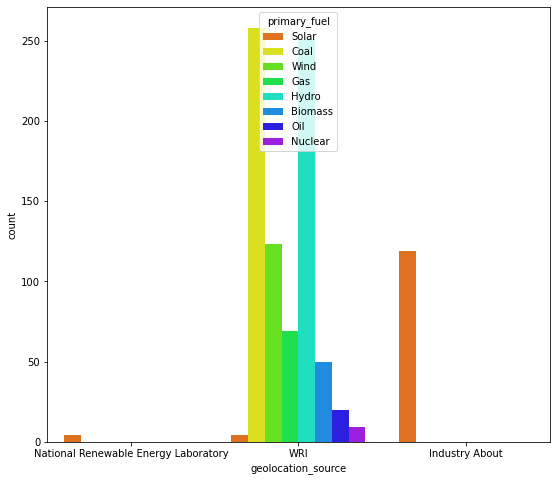

In [32]:
#Countplot of Primary_fuel

plt.figure(figsize=(9,8))
sns.countplot(df['geolocation_source'],palette='gist_rainbow',hue='primary_fuel',data=df);

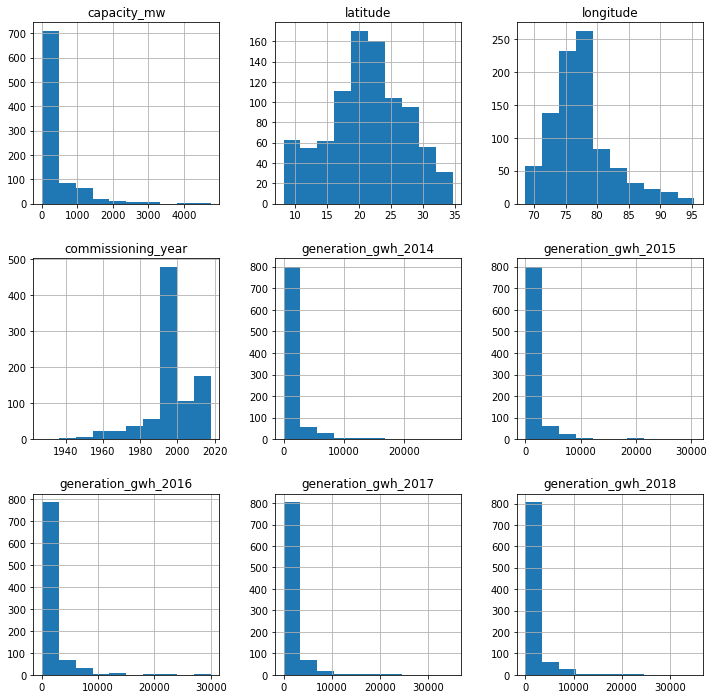

In [33]:
#Histogram
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

In [34]:
px.pie(df,values='capacity_mw',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)


In [35]:
px.pie(df,values='commissioning_year',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)


In [36]:
px.pie(df,values='generation_gwh_2014',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)


In [37]:
px.pie(df,values='generation_gwh_2015',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)


In [38]:
px.pie(df,values='generation_gwh_2016',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)


In [39]:
px.pie(df,values='generation_gwh_2017',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)


In [40]:
#Checking Unique of target variable

print(df['primary_fuel'].unique())
print(df['primary_fuel'].value_counts())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


In [41]:
df['primary_fuel']=df['primary_fuel'].replace('Coal',1)
df['primary_fuel']=df['primary_fuel'].replace('Hydro',2)
df['primary_fuel']=df['primary_fuel'].replace('Solar',3)
df['primary_fuel']=df['primary_fuel'].replace('Wind',4)
df['primary_fuel']=df['primary_fuel'].replace('Biomass',5)
df['primary_fuel']=df['primary_fuel'].replace('Oil',6)
df['primary_fuel']=df['primary_fuel'].replace('Nuclear',7)
df['primary_fuel']=df['primary_fuel'].replace('Gas',8)

In [42]:
df.describe().T

count         mean          std        min          25%  \
capacity_mw          907.0   326.223755   590.085456     0.0000    16.725000   
latitude             907.0    21.197918     6.079148     8.1689    17.072000   
longitude            907.0    77.464907     4.812291    68.6447    74.388900   
primary_fuel         907.0     2.886439     2.005319     1.0000     1.000000   
commissioning_year   907.0  1997.091082    13.016360  1927.0000  1997.091082   
generation_gwh_2014  907.0  2431.823590  2665.338608     0.0000  1211.362750   
generation_gwh_2015  907.0  2428.226946  2859.349132     0.0000   916.000000   
generation_gwh_2016  907.0  2467.936859  2877.890004     0.0000   896.500214   
generation_gwh_2017  907.0  2547.759305  2921.502193     0.0000   882.594850   
generation_gwh_2018  907.0  2600.804099  3030.808041     0.0000   824.842340   

                             50%          75%        max  
capacity_mw            59.200000   385.250000   4760.000  
latitude               21.281800    25.176450     34.649  
longitude              76.979200    79.206100     95.408  
primary_fuel            2.000000     4.000000      8.000  
commissioning_year   1997.091082  2003.000000   2018.000  
generation_gwh_2014  2431.823590  2431.823590  28127.000  
generation_gwh_2015  2428.226946  2428.226946  30539.000  
generation_gwh_2016  2467.936859  2467.936859  30015.000  
generation_gwh_2017  2547.759305  2547.759305  35116.000  
generation_gwh_2018  2600.804099  2600.804099  35136.000

In [43]:
from sklearn.preprocessing import LabelEncoder


In [44]:
#removing target variable

df1=df.drop('primary_fuel',axis=1)

In [45]:
df1=df1.apply(LabelEncoder().fit_transform)

In [46]:
df1['primary_fuel']=df['primary_fuel']

In [47]:
df1

name  gppd_idnr  capacity_mw  latitude  longitude  other_fuel1  \
0       0        657            9       731        143            2   
1       1        519          177       594        234            2   
2       2        853          121       420          8            2   
3       3          0          200       547        806            2   
4       4          1          340       423        702            2   
..    ...        ...          ...       ...        ...          ...   
902   902        491          336       176        480            2   
903   903        822           10       104        553            2   
904   904        891           81       151        311            2   
905   905        539          167       572        167            2   
906   906        876           56        32        495            2   

     commissioning_year  owner  source  url  geolocation_source  \
0                    66    229     109  128                   1   
1                    52    258     174  173                   2   
2                    52      2      21  205                   2   
3                    59      5      22   58                   2   
4                    70      5      22   58                   2   
..                  ...    ...     ...  ...                 ...   
902                  71      5      22   58                   2   
903                  52    114      77   22                   0   
904                  52      5      21  260                   2   
905                  52     91      59   82                   2   
906                  52    279      21  245                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                    250                  265                  268   
1                    250                  265                  268   
2                    250                  265                  268   
3                    156                  196                  197   
4                    272                  349                  360   
..                   ...                  ...                  ...   
902                  250                    3                   99   
903                  250                  265                  268   
904                  250                  265                  268   
905                  250                  265                  268   
906                  250                  265                  268   

     generation_gwh_2017  generation_gwh_2018  primary_fuel  
0                    270                  272             3  
1                    270                  272             1  
2                    270                  272             4  
3                    176                  174             8  
4                    339                  374             1  
..                   ...                  ...           ...  
902                  193                  182             1  
903                  270                  272             3  
904                  270                  272             4  
905                  270                  272             1  
906                  270                  272             4  

[907 rows x 17 columns]

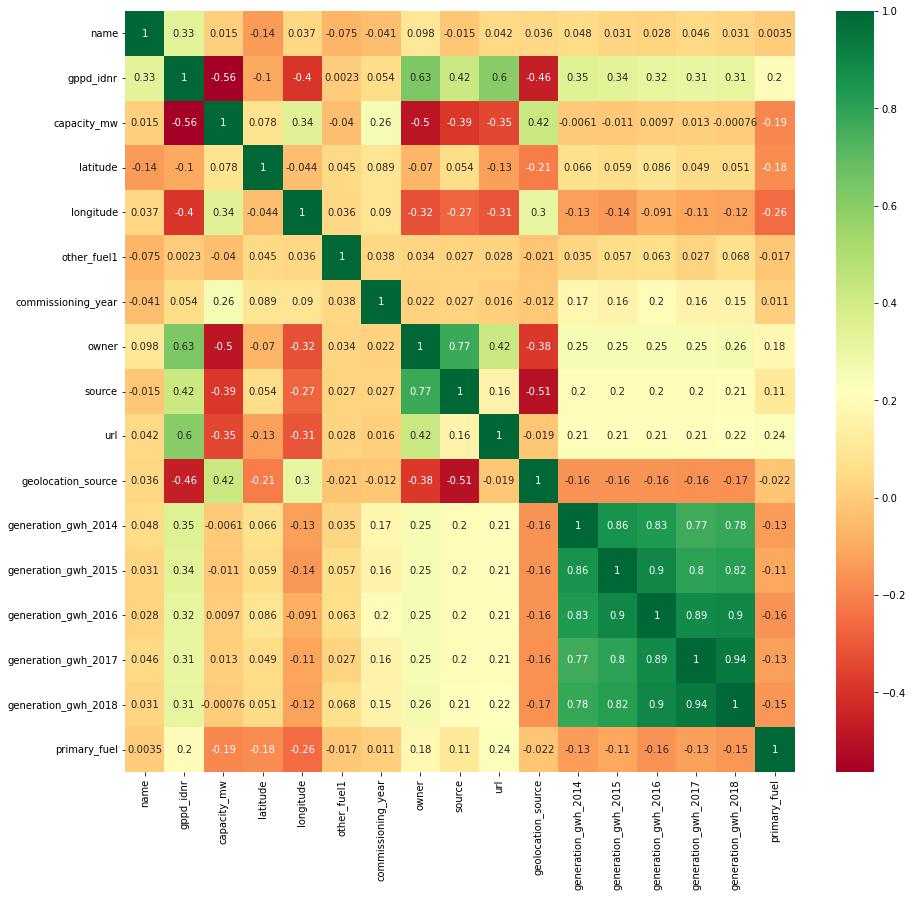

In [48]:
#Checking Correlation 

plt.figure(figsize=(15,14))
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn');

In [49]:
df1.corr()

name  gppd_idnr  capacity_mw  latitude  longitude  \
name                 1.000000   0.332205     0.014618 -0.137213   0.036612   
gppd_idnr            0.332205   1.000000    -0.563732 -0.100372  -0.395432   
capacity_mw          0.014618  -0.563732     1.000000  0.078279   0.344733   
latitude            -0.137213  -0.100372     0.078279  1.000000  -0.044093   
longitude            0.036612  -0.395432     0.344733 -0.044093   1.000000   
other_fuel1         -0.074663   0.002333    -0.040041  0.044511   0.036368   
commissioning_year  -0.041292   0.053931     0.260712  0.088759   0.089778   
owner                0.098075   0.630589    -0.495320 -0.069957  -0.321347   
source              -0.014640   0.416384    -0.392096  0.053914  -0.273287   
url                  0.041917   0.597080    -0.348166 -0.127709  -0.309979   
geolocation_source   0.036225  -0.464174     0.423657 -0.211405   0.304849   
generation_gwh_2014  0.047783   0.346833    -0.006148  0.066206  -0.127436   
generation_gwh_2015  0.031430   0.340109    -0.011158  0.059281  -0.142959   
generation_gwh_2016  0.028378   0.315496     0.009683  0.085754  -0.091117   
generation_gwh_2017  0.046151   0.306688     0.012681  0.048666  -0.111920   
generation_gwh_2018  0.030928   0.310391    -0.000765  0.050687  -0.118664   
primary_fuel         0.003540   0.203098    -0.189441 -0.175375  -0.255793   

                     other_fuel1  commissioning_year     owner    source  \
name                   -0.074663           -0.041292  0.098075 -0.014640   
gppd_idnr               0.002333            0.053931  0.630589  0.416384   
capacity_mw            -0.040041            0.260712 -0.495320 -0.392096   
latitude                0.044511            0.088759 -0.069957  0.053914   
longitude               0.036368            0.089778 -0.321347 -0.273287   
other_fuel1             1.000000            0.037823  0.033687  0.026590   
commissioning_year      0.037823            1.000000  0.021721  0.026775   
owner                   0.033687            0.021721  1.000000  0.769583   
source                  0.026590            0.026775  0.769583  1.000000   
url                     0.028154            0.016463  0.419773  0.160144   
geolocation_source     -0.021408           -0.012068 -0.384838 -0.505720   
generation_gwh_2014     0.034751            0.171476  0.248725  0.196322   
generation_gwh_2015     0.057197            0.159862  0.250465  0.197696   
generation_gwh_2016     0.063014            0.198602  0.250694  0.197876   
generation_gwh_2017     0.026986            0.160149  0.252934  0.199645   
generation_gwh_2018     0.067711            0.153997  0.262086  0.206869   
primary_fuel           -0.016624            0.011296  0.181082  0.106837   

                          url  geolocation_source  generation_gwh_2014  \
name                 0.041917            0.036225             0.047783   
gppd_idnr            0.597080           -0.464174             0.346833   
capacity_mw         -0.348166            0.423657            -0.006148   
latitude            -0.127709           -0.211405             0.066206   
longitude           -0.309979            0.304849            -0.127436   
other_fuel1          0.028154           -0.021408             0.034751   
commissioning_year   0.016463           -0.012068             0.171476   
owner                0.419773           -0.384838             0.248725   
source               0.160144           -0.505720             0.196322   
url                  1.000000           -0.018929             0.207868   
geolocation_source  -0.018929            1.000000            -0.158065   
generation_gwh_2014  0.207868           -0.158065             1.000000   
generation_gwh_2015  0.209323           -0.159171             0.856488   
generation_gwh_2016  0.209513           -0.159316             0.831844   
generation_gwh_2017  0.211386           -0.160740             0.765011   
generation_gwh_2018  0.219035           -0.166556             0.784

In [50]:
df_target=df1.corr()


In [51]:
df_target['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
url                    0.235336
gppd_idnr              0.203098
owner                  0.181082
source                 0.106837
commissioning_year     0.011296
name                   0.003540
other_fuel1           -0.016624
geolocation_source    -0.022338
generation_gwh_2015   -0.107072
generation_gwh_2017   -0.127337
generation_gwh_2014   -0.132839
generation_gwh_2018   -0.153036
generation_gwh_2016   -0.160440
latitude              -0.175375
capacity_mw           -0.189441
longitude             -0.255793
Name: primary_fuel, dtype: float64

In [52]:
# Scatter Plot
sns.set_theme()

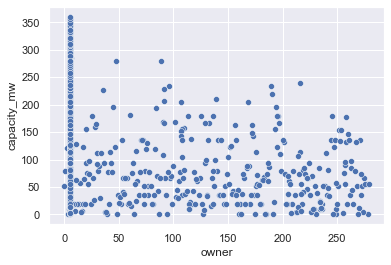

In [53]:
sns.scatterplot(df1['owner'],df1['capacity_mw'],palette='magma');

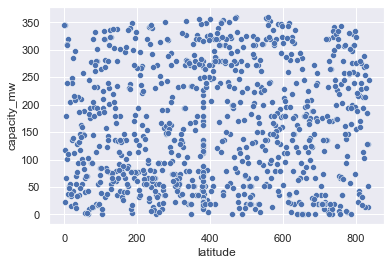

In [54]:
sns.scatterplot(df1['latitude'],df1['capacity_mw'],palette='magma');

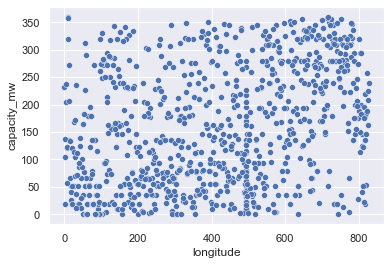

In [55]:
sns.scatterplot(df1['longitude'],df1['capacity_mw'],palette='magma');

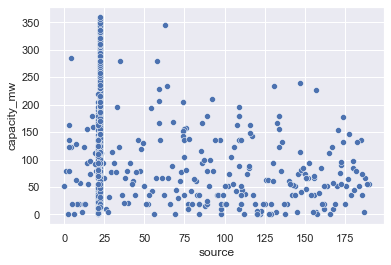

In [56]:
sns.scatterplot(df1['source'],df1['capacity_mw'],palette='magma');

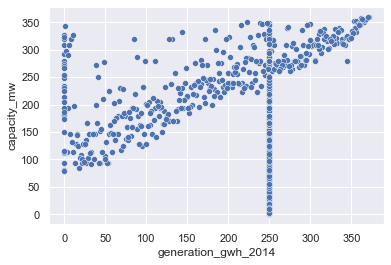

In [57]:
sns.scatterplot(df1['generation_gwh_2014'],df1['capacity_mw'],palette='magma');

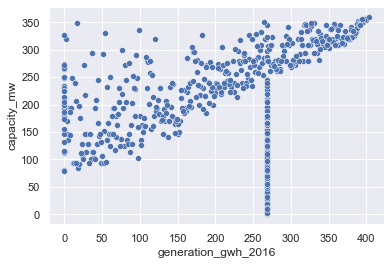

In [58]:
sns.scatterplot(df1['generation_gwh_2016'],df1['capacity_mw'],palette='magma');

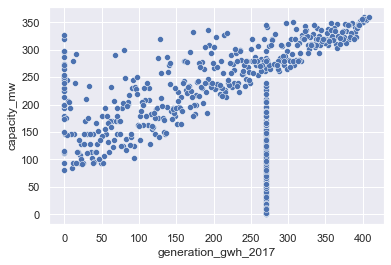

In [59]:
sns.scatterplot(df1['generation_gwh_2017'],df1['capacity_mw'],palette='magma');

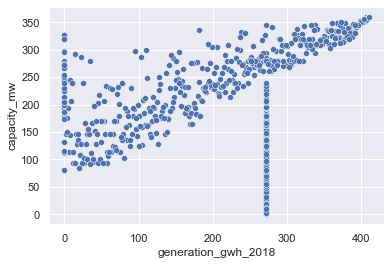

In [60]:
sns.scatterplot(df1['generation_gwh_2018'],df1['capacity_mw'],palette='magma');

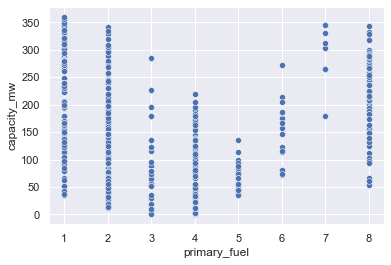

In [61]:
sns.scatterplot(df1['primary_fuel'],df1['capacity_mw'],palette='magma');

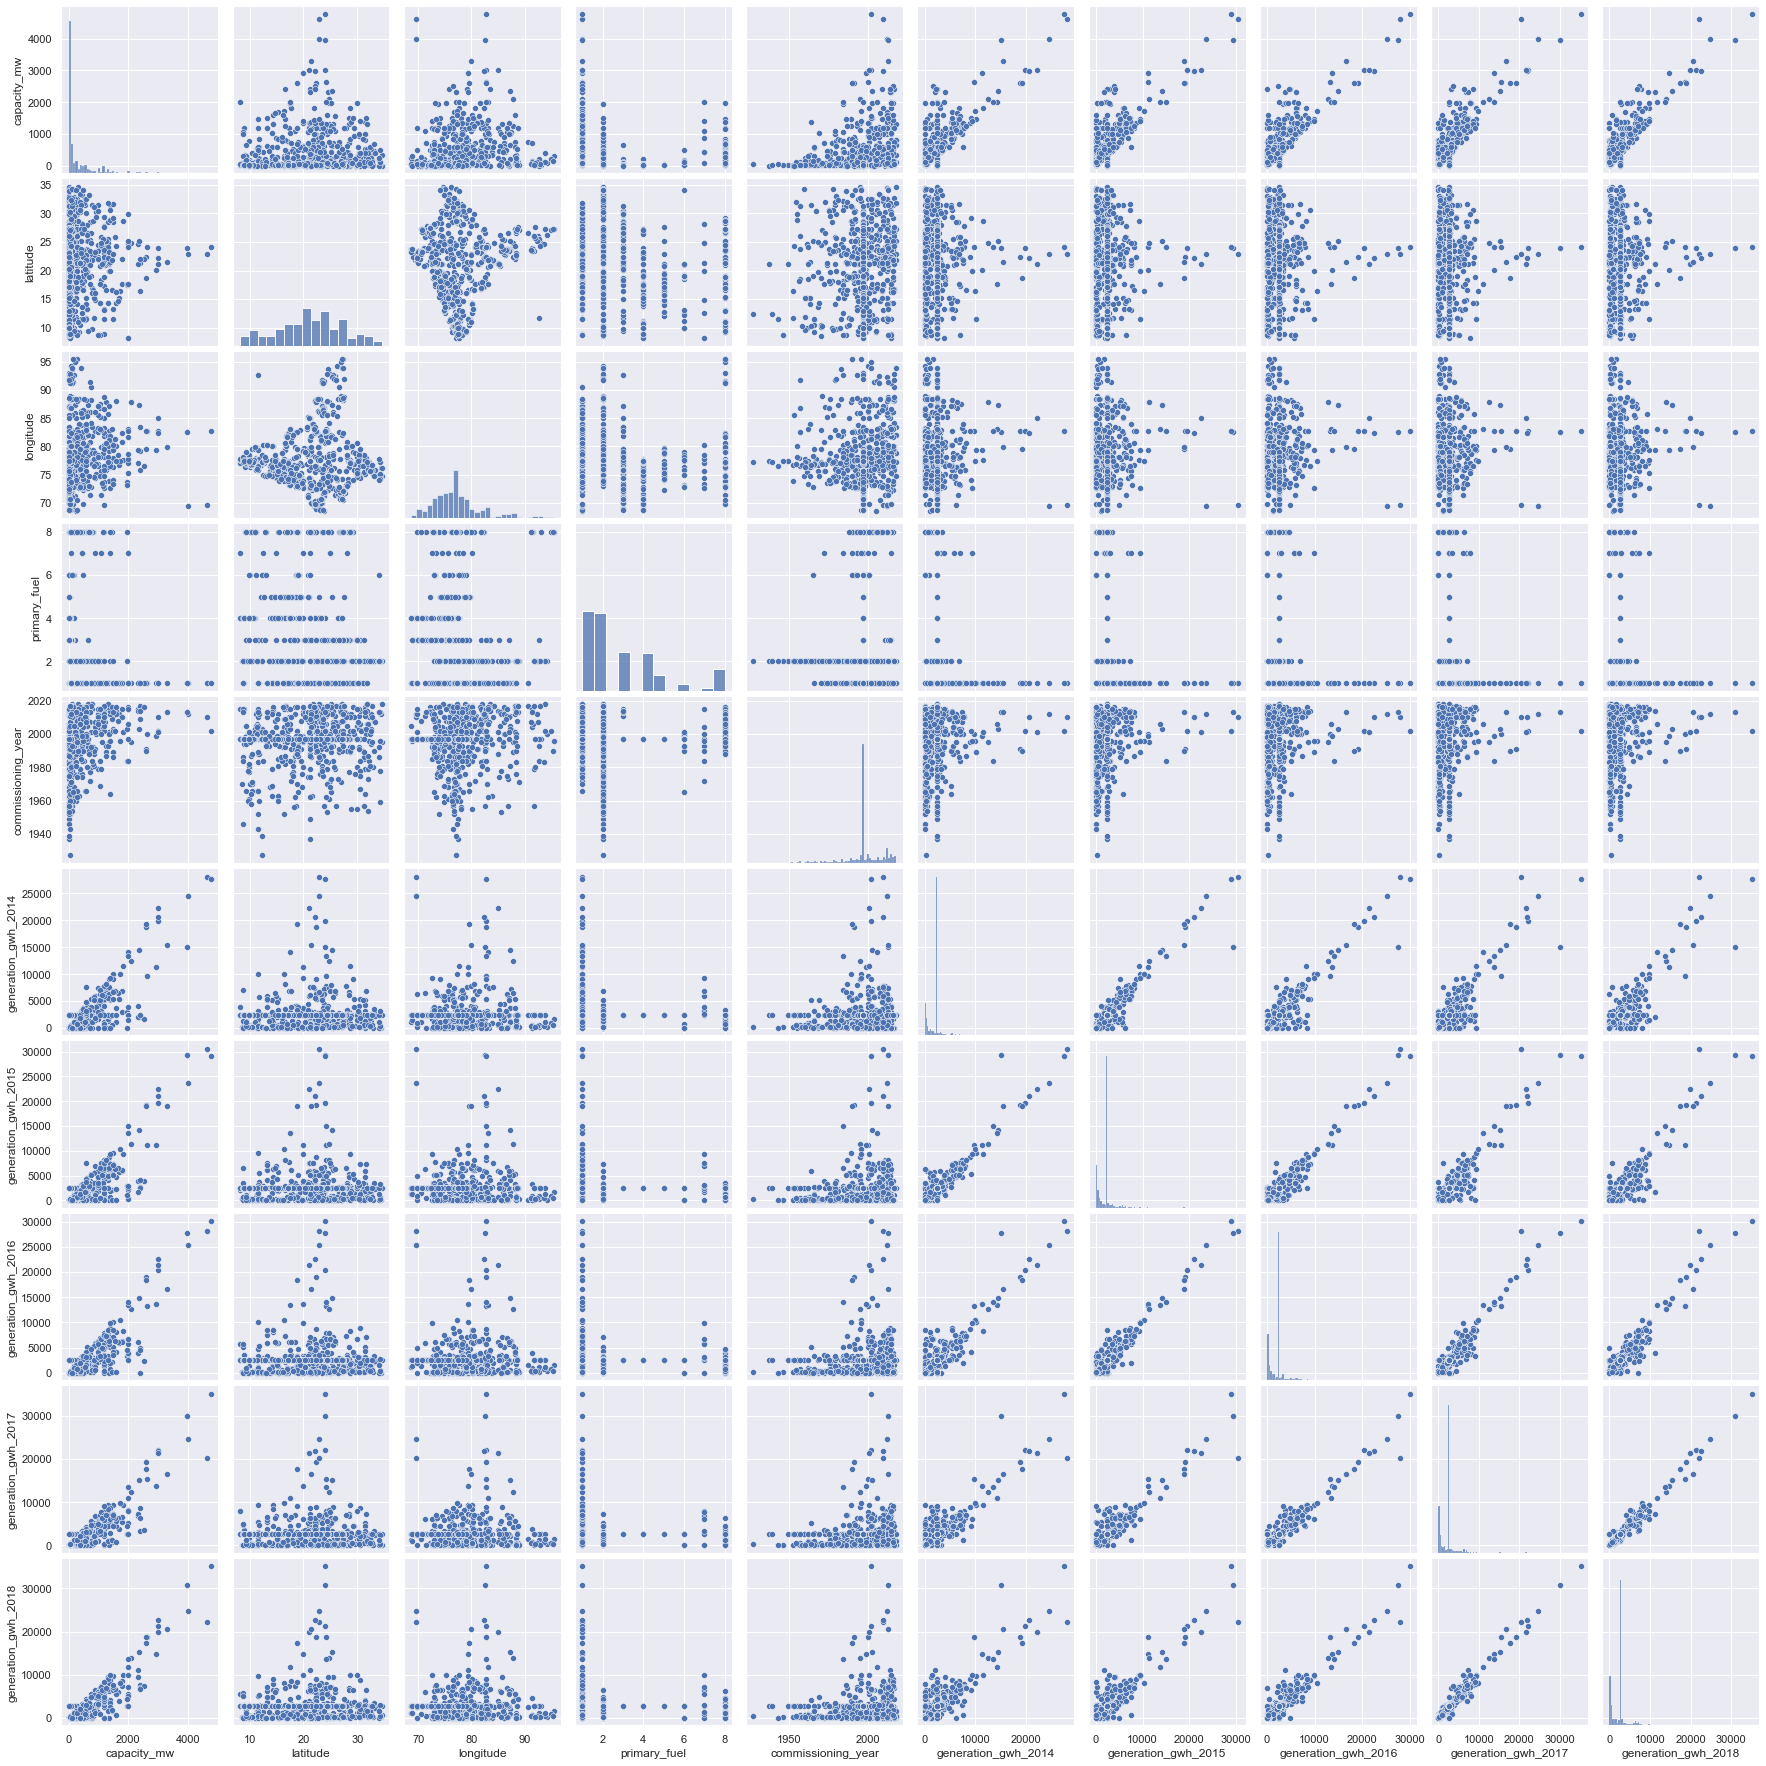

In [62]:
sns.pairplot(df)

# Dataset is imbalanced
## We are balacing it  using SMOTE


In [63]:
dfx=df1.iloc[:,0:-1]
dfy=df1.iloc[:,-1]

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
smt=SMOTE()

In [66]:
train_x,train_y=smt.fit_resample(dfx,dfy)


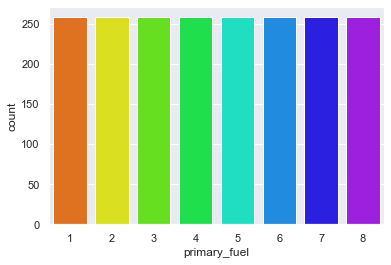

In [67]:
sns.countplot(train_y,palette='gist_rainbow');

In [68]:
df2=train_x

In [69]:
df2['primary_fuel']=train_y

In [70]:
df2.head()

name  gppd_idnr  capacity_mw  latitude  longitude  other_fuel1  \
0     0        657            9       731        143            2   
1     1        519          177       594        234            2   
2     2        853          121       420          8            2   
3     3          0          200       547        806            2   
4     4          1          340       423        702            2   

   commissioning_year  owner  source  url  geolocation_source  \
0                  66    229     109  128                   1   
1                  52    258     174  173                   2   
2                  52      2      21  205                   2   
3                  59      5      22   58                   2   
4                  70      5      22   58                   2   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  250                  265                  268   
1                  250                  265                  268   
2                  250                  265                  268   
3                  156                  196                  197   
4                  272                  349                  360   

   generation_gwh_2017  generation_gwh_2018  primary_fuel  
0                  270                  272             3  
1                  270                  272             1  
2                  270                  272             4  
3                  176                  174             8  
4                  339                  374             1

In [71]:
df2.shape

(2064, 17)

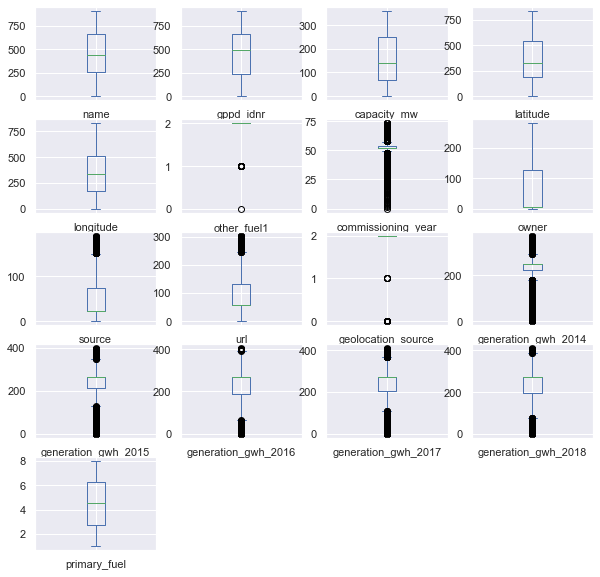

In [72]:
# Checking Outliers
df2.plot(kind='box',subplots=True,layout=(5,4),figsize=(10,10));

In [73]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df2))


In [74]:
threshold=3
print(np.where(z>3))

(array([  78,   90,  169,  170,  219,  221,  222,  254,  261,  294,  321,
        342,  371,  377,  444,  454,  469,  475,  478,  479,  484,  495,
        522,  531,  538,  541,  573,  583,  588,  592,  601,  621,  649,
        677,  694,  706,  709,  713,  728,  781,  807,  811,  813,  817,
        817,  848, 1393, 1394, 1397, 1397, 1406, 1408, 1414, 1416, 1426,
       1440, 1441, 1441, 1447, 1447, 1452, 1453, 1464, 1470, 1478, 1482,
       1482, 1485, 1491, 1497, 1499, 1512, 1527, 1527, 1530, 1533, 1539,
       1539, 1542, 1549, 1552, 1561, 1569, 1570, 1576, 1582, 1583, 1588,
       1597, 1600, 1606, 1611, 1612, 1612, 1620, 1622, 1623, 1625, 1625],
      dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 5

In [75]:
df_new=df2[(z<3).all(axis=1)]

In [76]:
#After removing outliers
df_new.shape

(1974, 17)

# VIF(Variance Inflation Factor)



In [77]:
x=df_new.drop('primary_fuel',axis=1)

In [78]:
y=df_new['primary_fuel']

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]
    return vif

In [81]:
vif()

Variables  VIF Factor
0                  name    1.372997
1             gppd_idnr    5.206434
2           capacity_mw    2.816190
3              latitude    1.198065
4             longitude    1.341935
5           other_fuel1   90.719718
6    commissioning_year    1.160052
7                 owner    4.547064
8                source    3.451747
9                   url    2.050391
10   geolocation_source    1.868814
11  generation_gwh_2014    4.890300
12  generation_gwh_2015    8.823034
13  generation_gwh_2016   12.094833
14  generation_gwh_2017    8.172560
15  generation_gwh_2018   10.886716

In [82]:
# Drop latitude,longitude, name and owner
x.drop('latitude',axis=1,inplace=True)
x.drop('longitude',axis=1,inplace=True)
x.drop('name',axis=1,inplace=True)
x.drop('owner',axis=1,inplace=True)

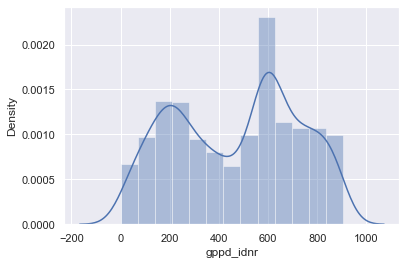

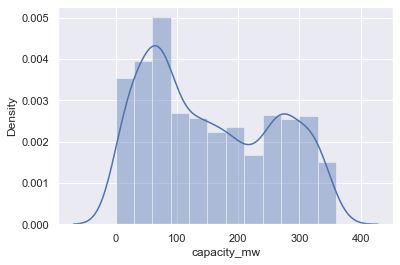

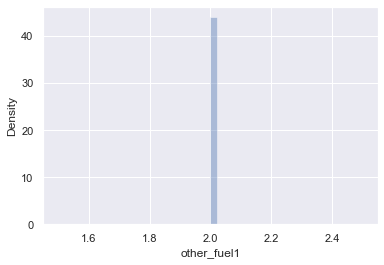

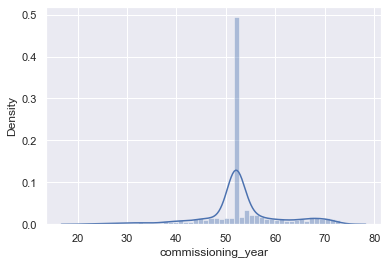

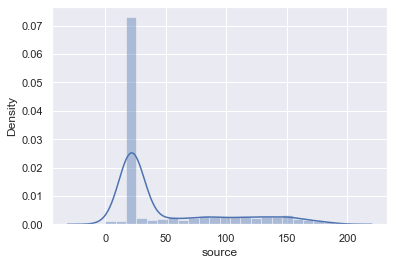

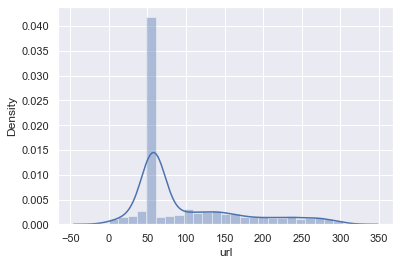

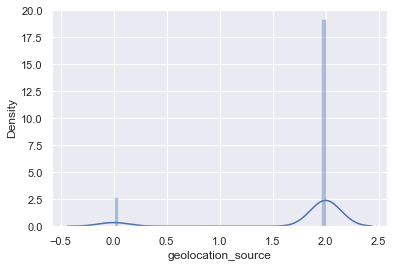

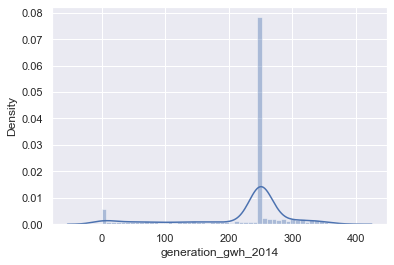

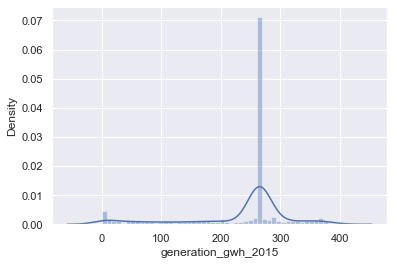

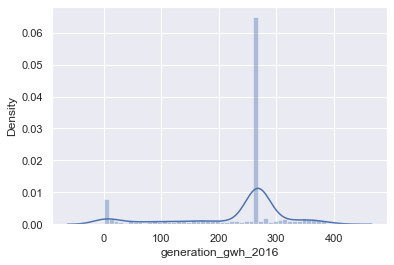

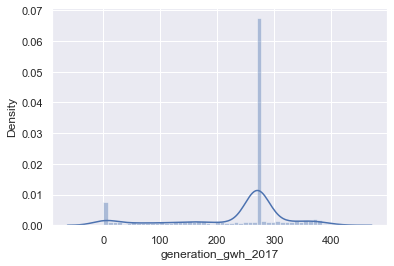

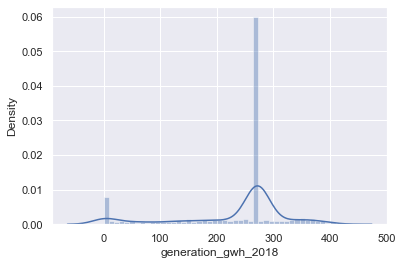

In [83]:
# Checking Outliers
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])

In [84]:
x.skew().sort_values(ascending=False)

source                 1.337417
url                    1.276649
capacity_mw            0.305734
other_fuel1            0.000000
gppd_idnr             -0.102845
commissioning_year    -0.252503
generation_gwh_2016   -1.210979
generation_gwh_2017   -1.213185
generation_gwh_2018   -1.235897
generation_gwh_2015   -1.352110
generation_gwh_2014   -1.486020
geolocation_source    -2.250349
dtype: float64

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scale=MinMaxScaler()

In [87]:
x=scale.fit_transform(x)

# Model Selection

In [88]:
x.shape

(1974, 12)

In [89]:
y.shape

(1974,)

In [90]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [91]:
lg=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [92]:
list_model=[lg,mnb,dtc,knc,svc,rfc,abc,gbc]

In [93]:
# LogisticRegression
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='YlOrBr', square=True)
    plt.xlabel("predicted")
    plt.show()

In [94]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.7655986509274874 Random state:- 83


accuracy_score:- 0.7537942664418212
              precision    recall  f1-score   support

           1       0.42      0.63      0.51        49
           2       0.56      0.69      0.62        48
           3       1.00      1.00      1.00        71
           4       1.00      0.89      0.94        92
           5       1.00      0.58      0.73       133
           6       0.40      0.71      0.51        38
           7       0.91      0.83      0.87        96
           8       0.61      0.70      0.65        66

    accuracy                           0.75       593
   macro avg       0.74      0.75      0.73       593
weighted avg       0.82      0.75      0.77       593



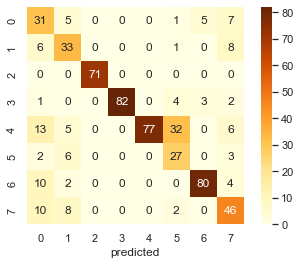

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=64)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

In [96]:
# MultinomialNB
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='gist_rainbow', square=True)
    plt.xlabel("predicted")
    plt.show()

In [97]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mnb.fit(x_train,y_train)
    pred=mnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.6323777403035413 Random state:- 10


accuracy_score:- 0.6205733558178752
              precision    recall  f1-score   support

           1       0.26      0.38      0.31        52
           2       0.00      0.00      0.00         0
           3       0.95      1.00      0.97        72
           4       1.00      0.95      0.97        92
           5       0.92      0.54      0.68       132
           6       0.00      0.00      0.00         0
           7       0.86      0.53      0.65       129
           8       0.59      0.43      0.50       116

    accuracy                           0.62       593
   macro avg       0.57      0.48      0.51       593
weighted avg       0.80      0.62      0.69       593



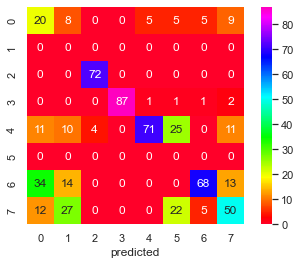

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
confusion_plot()

In [99]:
# DecisionTreeClassifier

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='coolwarm', square=True)
    plt.xlabel("predicted")
    plt.show()

In [100]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8903878583473862 Random state:- 64


accuracy_score:- 0.8414839797639123
              precision    recall  f1-score   support

           1       0.50      0.69      0.58        49
           2       0.66      0.74      0.69        57
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        78
           5       0.91      0.87      0.89        89
           6       0.77      0.77      0.77        52
           7       0.97      0.93      0.95        84
           8       0.80      0.66      0.73       100

    accuracy                           0.84       593
   macro avg       0.83      0.83      0.83       593
weighted avg       0.85      0.84      0.85       593



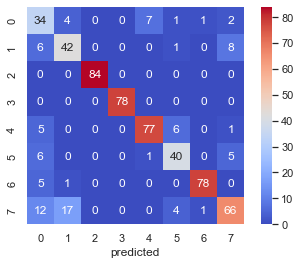

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [102]:
# KNeighborsClassifier
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='icefire', square=True)
    plt.xlabel("predicted")
    plt.show()

In [103]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8802698145025295 Random state:- 96


accuracy_score:- 0.8549747048903878
              precision    recall  f1-score   support

           1       0.45      0.79      0.58        38
           2       0.65      0.76      0.70        59
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        78
           5       0.95      0.84      0.89        83
           6       0.93      0.80      0.86        80
           7       1.00      0.85      0.92        91
           8       0.77      0.73      0.75        79

    accuracy                           0.85       593
   macro avg       0.84      0.85      0.84       593
weighted avg       0.88      0.85      0.86       593



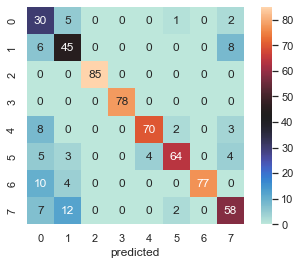

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=57)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

In [105]:
#Support vector Classifier
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
    plt.xlabel("predicted")
    plt.show()

In [106]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8128161888701517 Random state:- 30


accuracy_score:- 0.8026981450252951
              precision    recall  f1-score   support

           1       0.44      0.60      0.51        52
           2       0.50      0.94      0.65        34
           3       0.98      1.00      0.99        93
           4       1.00      0.93      0.97        76
           5       0.96      0.84      0.90        90
           6       0.84      0.53      0.65        68
           7       0.96      0.80      0.87       114
           8       0.61      0.70      0.65        66

    accuracy                           0.80       593
   macro avg       0.79      0.79      0.77       593
weighted avg       0.84      0.80      0.81       593



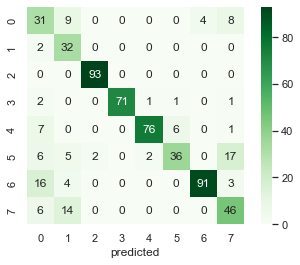

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=83)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

In [108]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='viridis', square=True)
    plt.xlabel("predicted")
    plt.show()

In [109]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9258010118043845 Random state:- 83


accuracy_score:- 0.9038785834738617
              precision    recall  f1-score   support

           1       0.69      0.82      0.75        61
           2       0.77      0.79      0.78        56
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        80
           5       0.98      0.90      0.94        99
           6       0.96      0.94      0.95        70
           7       0.99      0.90      0.94        80
           8       0.79      0.84      0.82        74

    accuracy                           0.90       593
   macro avg       0.90      0.90      0.90       593
weighted avg       0.91      0.90      0.91       593



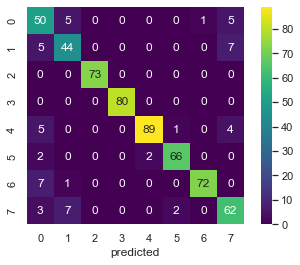

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

In [111]:
# AdaBoostClassifier
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='mako', square=True)
    plt.xlabel("predicted")
    plt.show()

In [112]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.5885328836424958 Random state:- 83


accuracy_score:- 0.554806070826307
              precision    recall  f1-score   support

           1       0.04      1.00      0.08         3
           2       0.24      0.67      0.35        24
           3       0.94      1.00      0.97        82
           4       1.00      1.00      1.00        67
           5       1.00      0.24      0.39       304
           6       0.00      0.00      0.00         0
           7       0.93      0.77      0.84       113
           8       0.00      0.00      0.00         0

    accuracy                           0.55       593
   macro avg       0.52      0.58      0.45       593
weighted avg       0.94      0.55      0.62       593



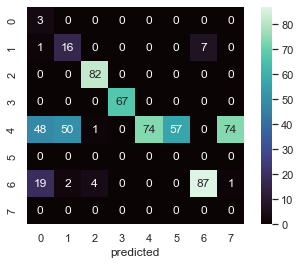

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=37)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

In [119]:
# Cross Validation
for model in list_model:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.70126582 0.74683544 0.70632911 0.67341772 0.67005076]
0.6995797725374284
MultinomialNB()
[0.58734177 0.61012658 0.58227848 0.6        0.58629442]
0.5932082503373386
DecisionTreeClassifier()
[0.83544304 0.78481013 0.87341772 0.84810127 0.83756345]
0.8358671207350767
KNeighborsClassifier()
[0.82278481 0.78734177 0.84556962 0.84050633 0.84771574]
0.8287836535372358
SVC()
[0.76708861 0.7721519  0.79746835 0.7721519  0.76903553]
0.775579258497719
RandomForestClassifier()
[0.88860759 0.85822785 0.90886076 0.88101266 0.91116751]
0.8895752746899699
AdaBoostClassifier()
[0.53924051 0.53164557 0.55189873 0.53924051 0.54060914]
0.5405268907023068
GradientBoostingClassifier()
[0.83291139 0.83037975 0.88101266 0.88101266 0.86294416]
0.8576521236265503


# Random Forest Classifier is the best model

In [120]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
    plt.xlabel("predicted")
    plt.show()

accuracy_score:- 0.9139966273187183
              precision    recall  f1-score   support

           1       0.74      0.80      0.77        66
           2       0.81      0.81      0.81        57
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        80
           5       0.98      0.92      0.95        97
           6       0.99      0.96      0.97        71
           7       0.96      0.91      0.93        77
           8       0.81      0.88      0.84        72

    accuracy                           0.91       593
   macro avg       0.91      0.91      0.91       593
weighted avg       0.92      0.91      0.92       593



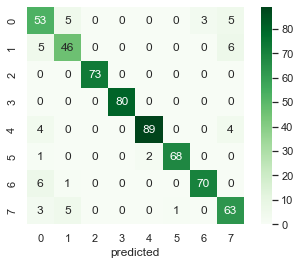

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

In [122]:
# Hyperparameters for a model
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}


In [123]:
for i in range(3,10):
    rfc_grid = GridSearchCV(rfc, random_forest_params, cv=i)
    rfc_grid.fit(x_train,y_train)
    print('Best score:', rfc_grid.best_score_)
    print('Best score:', rfc_grid.best_params_)
    print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8790798201766795
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='entropy')
Best score: 0.8863135628717433
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(max_features='sqrt')
Best score: 0.8899414011405848
Best score: {'criterion': 'gini', 'max_features': 'auto'}
Best score: RandomForestClassifier()
Best score: 0.8921105464583725
Best score: {'criterion': 'entropy', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(criterion='entropy', max_features='sqrt')
Best score: 0.8899363467891387
Best score: {'criterion': 'entropy', 'max_features': 'log2'}
Best score: RandomForestClassifier(criterion='entropy', max_features='log2')
Best score: 0.8899087578975668
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(max_features='sqrt')
Best score: 0.8942647766177179
Best score: {'criterion': 'entropy', 'max_features': 'log2'}
Best s

In [124]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=10)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8921228234803461
Best score: {'criterion': 'gini', 'max_features': 'log2'}
Best score: RandomForestClassifier(max_features='log2')


In [125]:
pred_prob=rfc_grid.best_estimator_.predict_proba(x_test)

In [126]:
# ROC Curve for Classes
fpr = {}
tpr = {}
thresh ={}

n_class=8

In [127]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

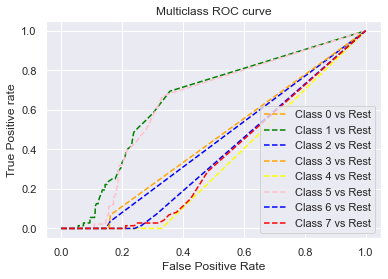

In [128]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='orange', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='blue', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='red', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# Save the model

In [129]:
import joblib

In [130]:
#save the model
joblib.dump(rfc_grid.best_estimator_,'global_power_plant_rfc.obj')

['global_power_plant_rfc.obj']